In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import qiskit
from qiskit import Aer, QuantumCircuit
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.utils import QuantumInstance

from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.datasets import breast_cancer

from IPython.display import clear_output

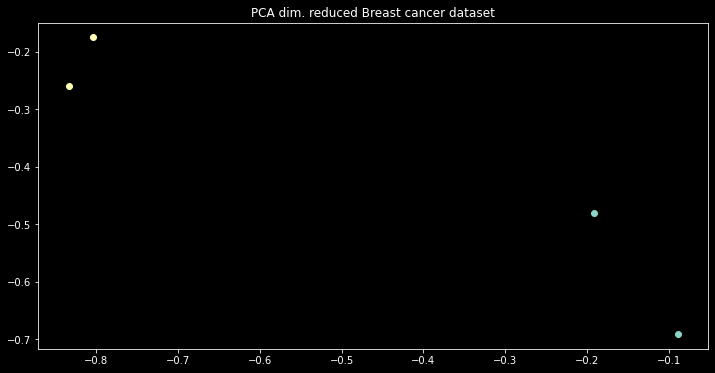

In [66]:
num_inputs = 2
Xtrain, Ytrain, Xtest, Ytest = breast_cancer(training_size=num_inputs,
                                            test_size=20, n = num_inputs, 
                                             plot_data=True, one_hot=True)

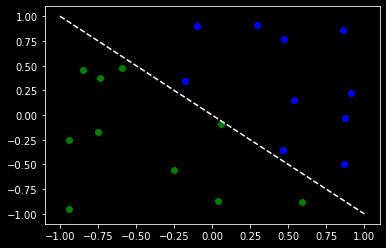

In [5]:
num_samples = 20
X = 2*np.random.random([num_samples, num_inputs]) - 1
y01 = 1*(np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2*y01-1                       # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], 'bo')
    else:
        plt.plot(x[0], x[1], 'go')
plt.plot([-1, 1], [1, -1], '--', color='white')
plt.show()

In [6]:
quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator'))

In [13]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
#     print(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [67]:
# construct feature map, ansatz, and optimizer
feature_map = ZZFeatureMap(num_inputs, reps=2)
# ansatz = TwoLocal(num_inputs, rotation_blocks='ry', entanglement_blocks='cx', 
#                  entanglement='linear', reps=2)
ansatz = qiskit.circuit.library.RealAmplitudes(num_inputs, reps=2)
print(feature_map)
print(ansatz)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘
     ┌──────────┐     ┌──────────┐     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2]) ├──■──┤ Ry(θ[4]) ├
     ├──────────┤┌─┴─┐├──────────┤┌─┴─┐├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ X ├┤ Ry(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├
     └──────────┘└───┘└──────────┘└───┘└──────────┘


In [76]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          loss='cross_entropy',
          optimizer=GradientDescent(),
          quantum_instance=quantum_instance,
          callback=callback_graph)

In [77]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(Xtrain, Ytrain)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(Xtest, Ytest)

Process ForkProcess-15625:
Process ForkProcess-15624:
FAILURE: Can not get job id, Resubmit the qobj to get job id. Terra job error: 'Keyboard interrupt in parallel_map.' 
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Us

  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
KeyboardInterrupt
  File "/Users/usamazulfiqar/.pyenv/versions/3.7.9/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
KeyboardInt

KeyboardInterrupt: 